In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# NO

In [83]:

def preprocess_data(df):
    # 去掉负数值和大于140 or 65 的异常值
    df = df[(df['NO_weighted_value(ug m-3)'] >= 0) & (df['NO_weighted_value(ug m-3)'] <= 80)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\NO_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-NO_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-NO_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-NO_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-NO_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-NO_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-NO_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-NO_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'NO_weighted_value(ug m-3)']]])
    summary_stats[name] = df['NO_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df)


            Camden  City of London    Islington  Kensington and Chelsea  \
count  2398.000000     2197.000000  2391.000000             2391.000000   
mean      7.687885       21.642283     4.898642                4.499034   
std       9.249698       19.400270     8.587825                8.764782   
min       0.400000        0.100000    -0.000000                0.000000   
25%       2.304167        5.500000     1.400000                0.900000   
50%       4.520000       16.100000     2.200000                1.700000   
75%       9.200000       32.300000     4.200000                3.600000   
max      79.000000       79.400000    78.700000               79.200000   

           Lambeth    Southwark  Westminster  
count  2349.000000  2342.000000  2342.000000  
mean     21.557871    17.569402    31.006561  
std      14.268735    16.054235    13.226619  
min       1.900000     0.000000     1.600000  
25%      11.500000     4.500000    21.850000  
50%      18.120000    13.240000    29.7000

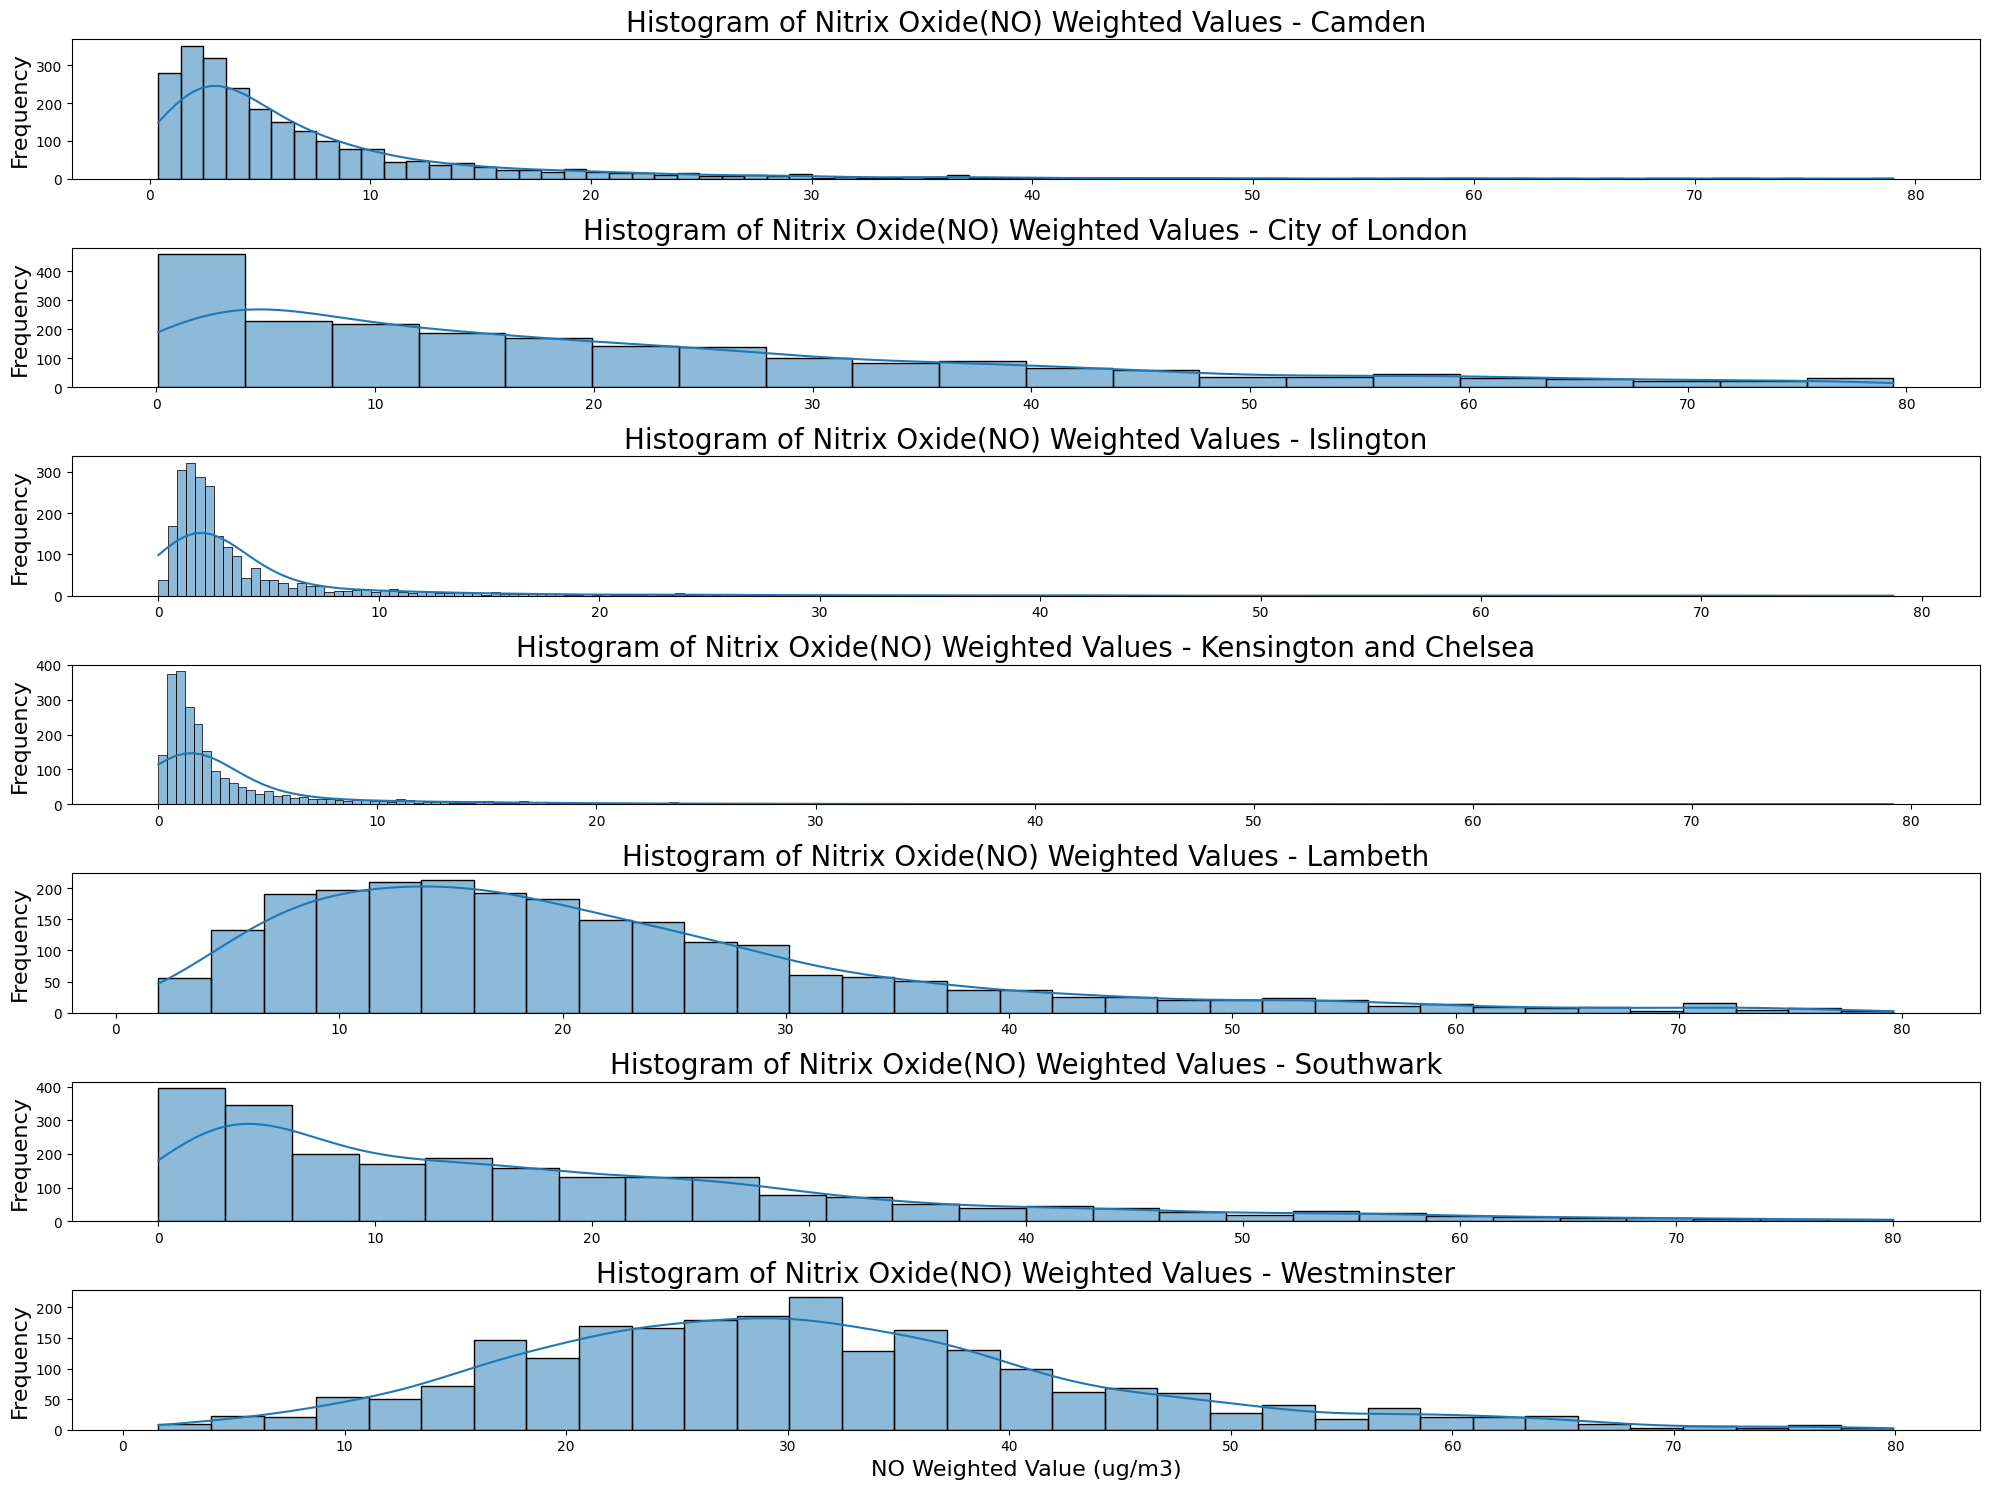

In [84]:

# 可视化数据分布
plt.figure(figsize=(20, 15))

# # 直方图
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    sns.histplot(df['NO_weighted_value(ug m-3)'], kde=True)
    plt.title(f'Histogram of Nitrix Oxide(NO) Weighted Values - {name}', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    if i == len(datasets):  # Only set x-label for the last subplot
        plt.xlabel('NO Weighted Value (ug/m3)', fontsize=16)
    else:
        plt.xlabel('')  # Hide x-label for other subplots
plt.tight_layout()
plt.show()

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     sns.histplot(df['NO_weighted_value(ug m-3)'], kde=True)
#     plt.title(f'Histogram of NO Weighted Values - {name}', fontsize=20)

#     plt.ylabel('Frequency', fontsize=16)
# plt.xlabel('NO Weighted Value (ug/m3)', fontsize=16)
# plt.tight_layout()
# plt.show()

C:\Users\Chailee\AppData\Local\Temp\ipykernel_4312\3600208189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='NO_weighted_value(ug m-3)', data=combined_df, palette="Set2")


Text(0, 0.5, 'NO Weighted Value (ug/m3)')

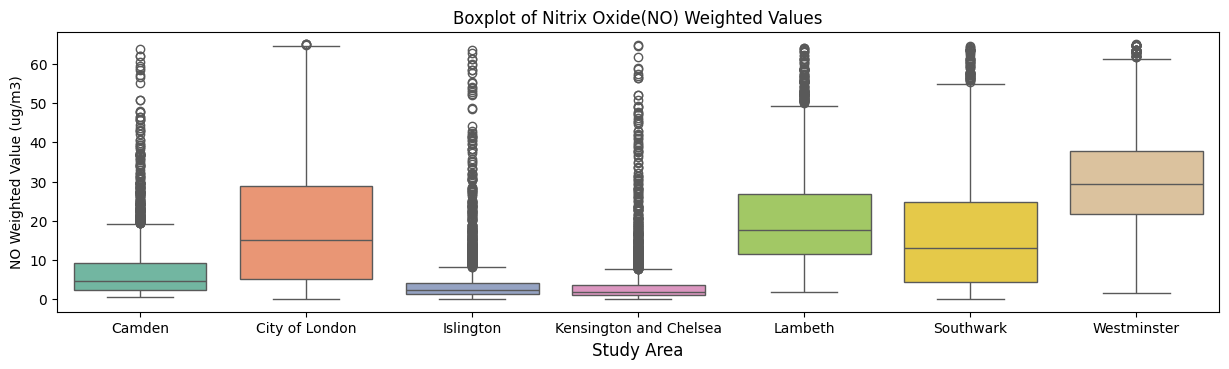

In [73]:
# 可视化数据分布
plt.figure(figsize=(15, 8))
# 箱线图
plt.subplot(2, 1, 2)
sns.boxplot(x='Region', y='NO_weighted_value(ug m-3)', data=combined_df, palette="Set2")
plt.title('Boxplot of Nitrix Oxide(NO) Weighted Values')
plt.xlabel('Study Area', fontsize=12)
plt.ylabel('NO Weighted Value (ug/m3)')

# plt.subplot(2, 1, 2)
# sns.boxplot(data=[df['NO_weighted_value(ug m-3)'] for df in datasets.values()], palette="Set2")
# plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
# plt.title('Boxplot of NO Weighted Values')
# plt.xlabel('Study Area')
# plt.ylabel('NO Weighted Value (ug/m3)')

# plt.tight_layout()
# plt.show()

## Time Series Analysis

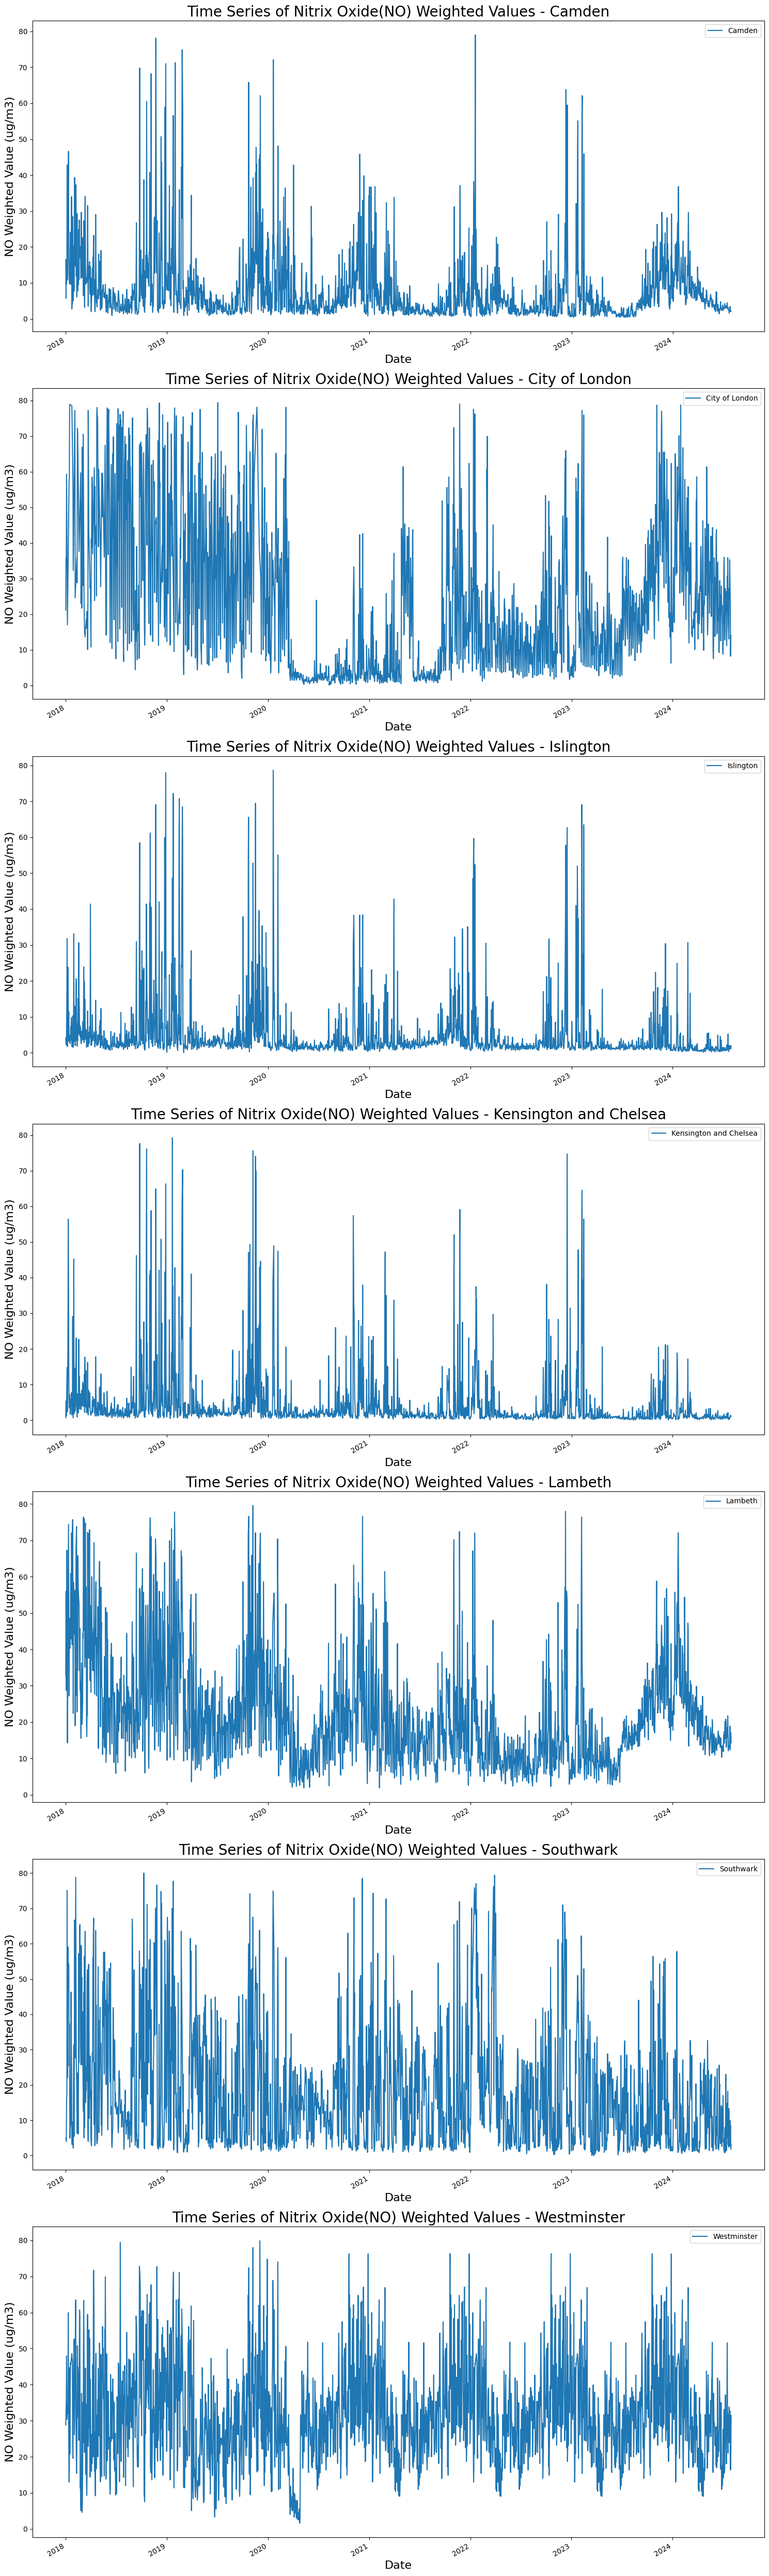

In [85]:
# 绘制时间序列图
plt.figure(figsize=(15, 50))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    df['NO_weighted_value(ug m-3)'].plot(label=name)

    plt.legend()
    plt.title(f'Time Series of Nitrix Oxide(NO) Weighted Values - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('NO Weighted Value (ug/m3)', fontsize=16)

plt.tight_layout()
plt.show()


# NO2

In [111]:

def preprocess_data(df):
    # 去掉负数值和大于140 or 65 的异常值
    df = df[(df['NO2_weighted_value(ug m-3)'] >= 0) & (df['NO2_weighted_value(ug m-3)'] <= 120)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\NO2_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-NO2_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-NO2_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-NO2_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-NO2_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-NO2_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-NO2_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-NO2_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'NO2_weighted_value(ug m-3)']]])
    summary_stats[name] = df['NO2_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df)


            Camden  City of London    Islington  Kensington and Chelsea  \
count  2402.000000     2403.000000  2403.000000             2403.000000   
mean     29.232118       26.045832    20.727642               20.814210   
std      12.671702       12.259280    11.065717               12.863611   
min       4.600000        2.400000     0.800000                1.400000   
25%      19.800000       17.200000    12.700000               11.250000   
50%      27.840000       24.000000    18.300000               17.700000   
75%      36.775000       32.780000    26.200000               27.680000   
max      89.700000      104.800000    81.800000               91.900000   

           Lambeth    Southwark  Westminster  
count  2404.000000  2404.000000  2404.000000  
mean     39.373263    29.396441    50.088803  
std      15.728722    16.644106     9.869555  
min       7.100000     1.900000     7.800000  
25%      28.400000    16.600000    44.100000  
50%      37.400000    26.400000    50.0000

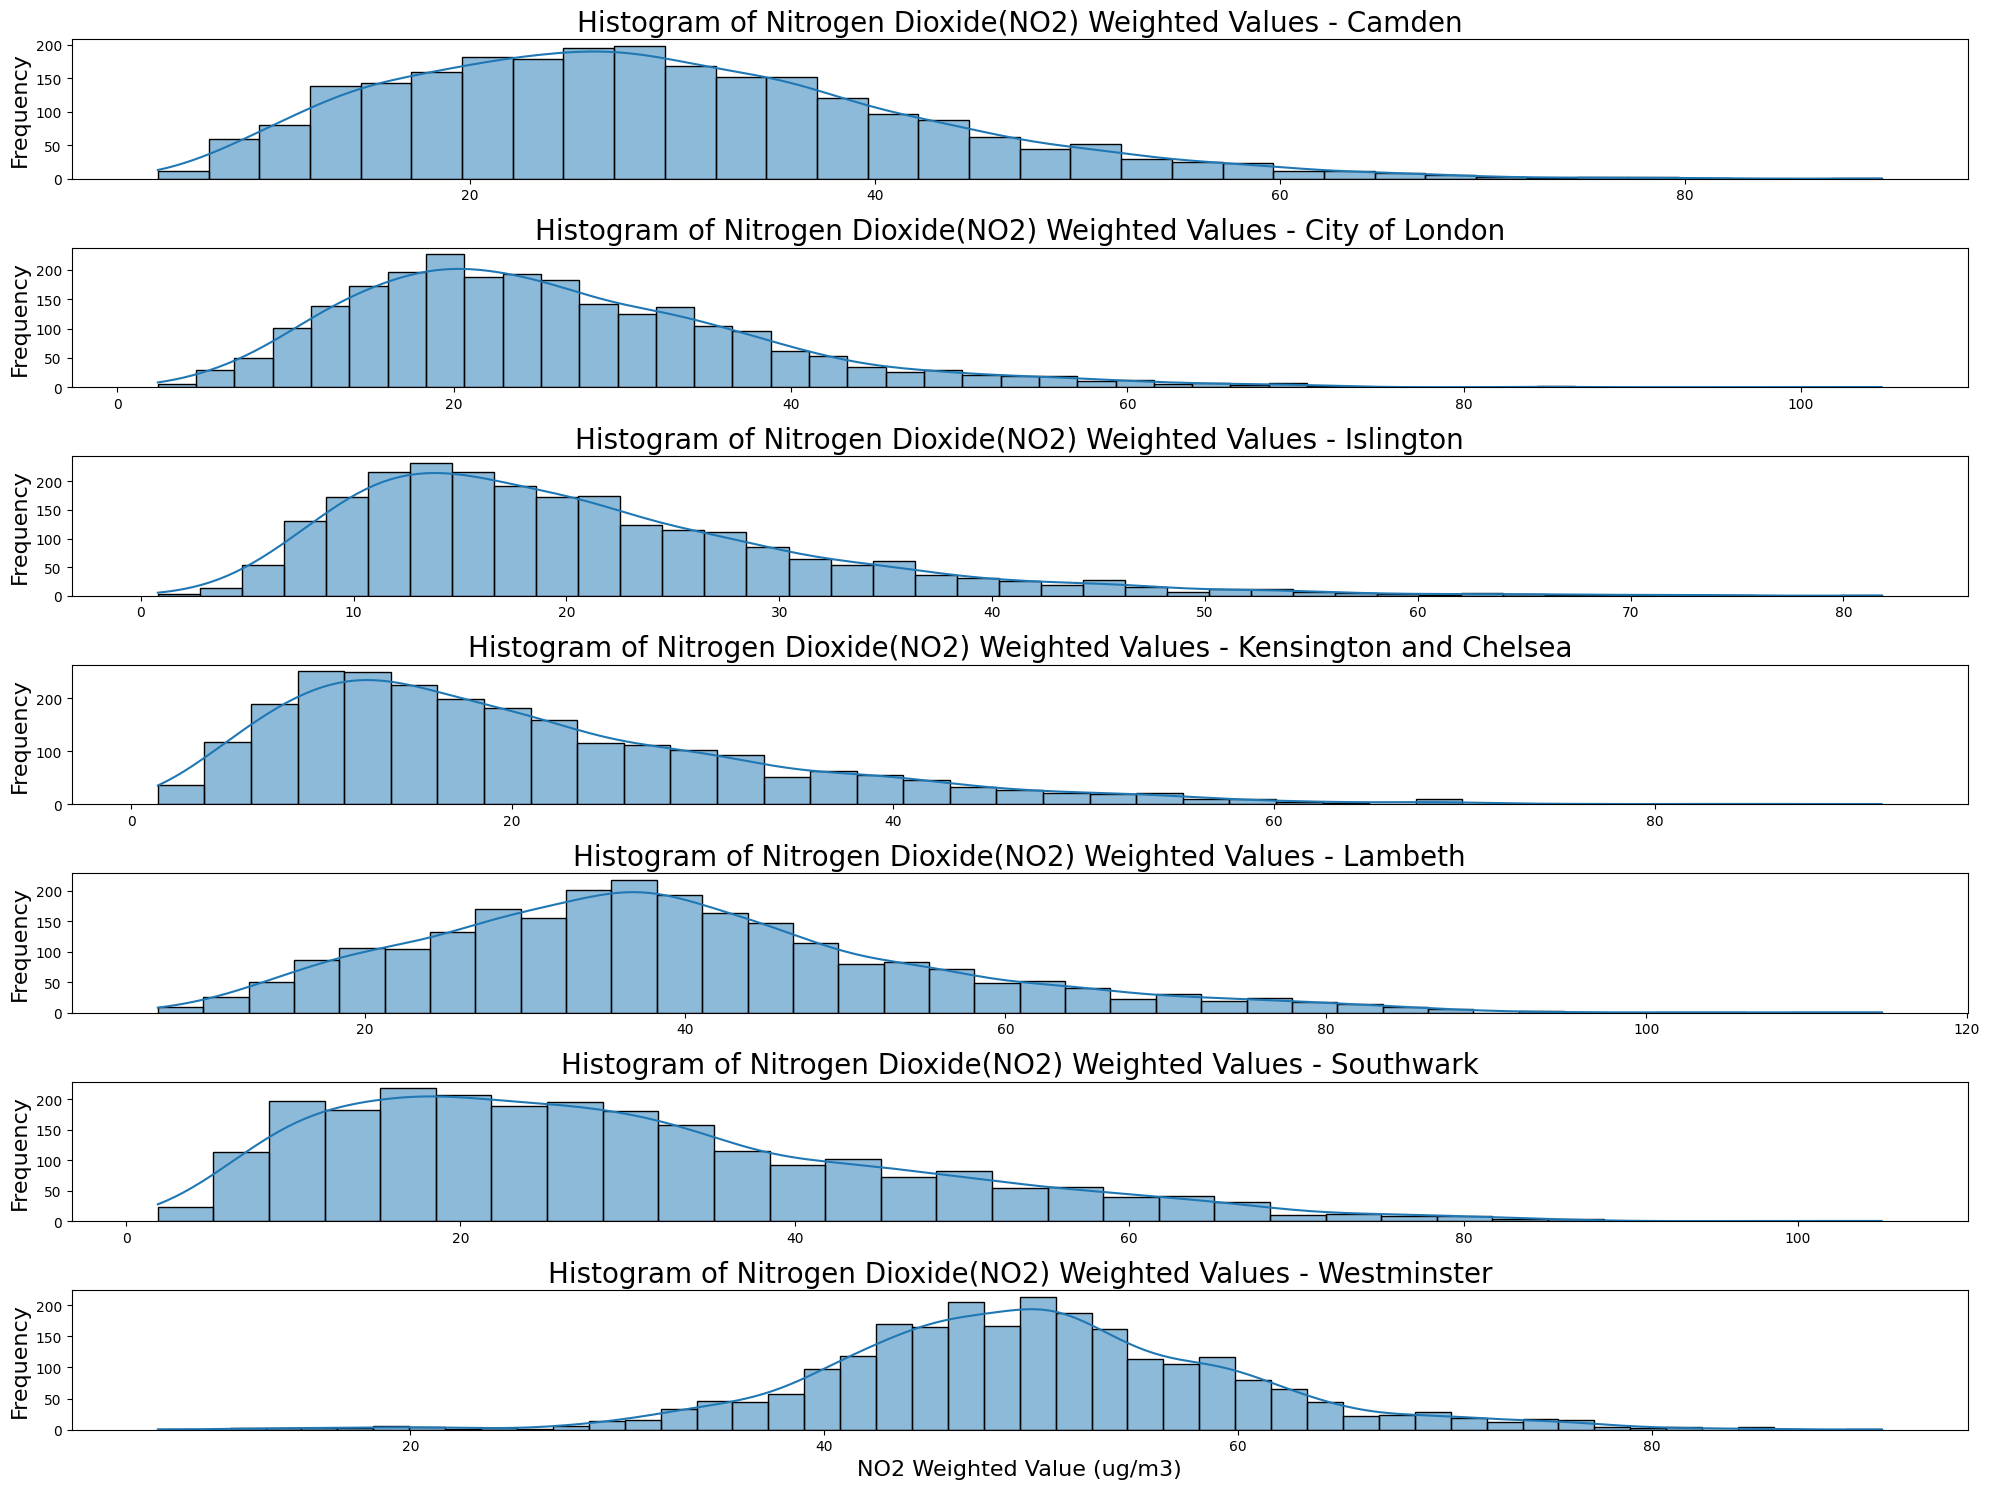

In [112]:

# 可视化数据分布
plt.figure(figsize=(20, 15))

# # 直方图
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    sns.histplot(df['NO2_weighted_value(ug m-3)'], kde=True)
    plt.title(f'Histogram of Nitrogen Dioxide(NO2) Weighted Values - {name}', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    if i == len(datasets):  # Only set x-label for the last subplot
        plt.xlabel('NO2 Weighted Value (ug/m3)', fontsize=16)
    else:
        plt.xlabel('')  # Hide x-label for other subplots
plt.tight_layout()
plt.show()


C:\Users\Chailee\AppData\Local\Temp\ipykernel_4312\1372818331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='NO2_weighted_value(ug m-3)', data=combined_df, palette="Set2")


Text(0, 0.5, 'NO2 Weighted Value (ug/m3)')

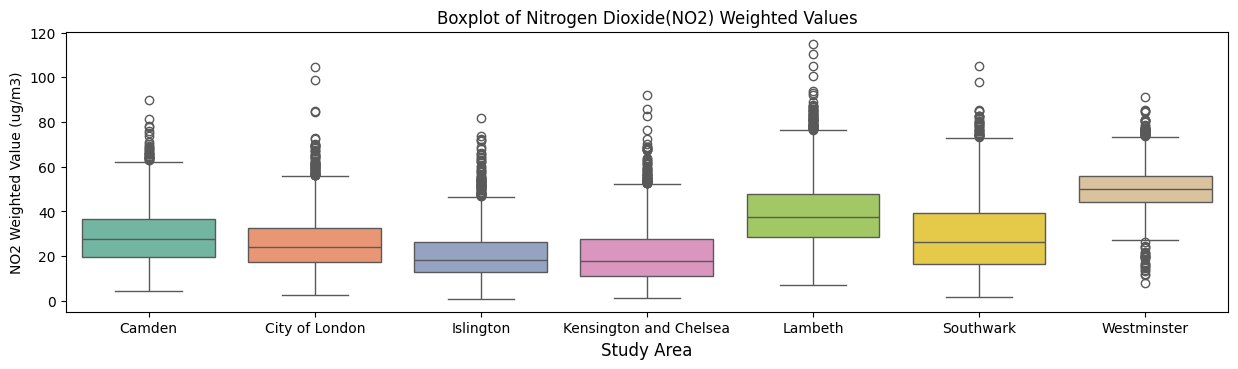

In [113]:
# 可视化数据分布
plt.figure(figsize=(15, 8))
# 箱线图
plt.subplot(2, 1, 2)
sns.boxplot(x='Region', y='NO2_weighted_value(ug m-3)', data=combined_df, palette="Set2")
plt.title('Boxplot of Nitrogen Dioxide(NO2) Weighted Values')
plt.xlabel('Study Area', fontsize=12)
plt.ylabel('NO2 Weighted Value (ug/m3)')


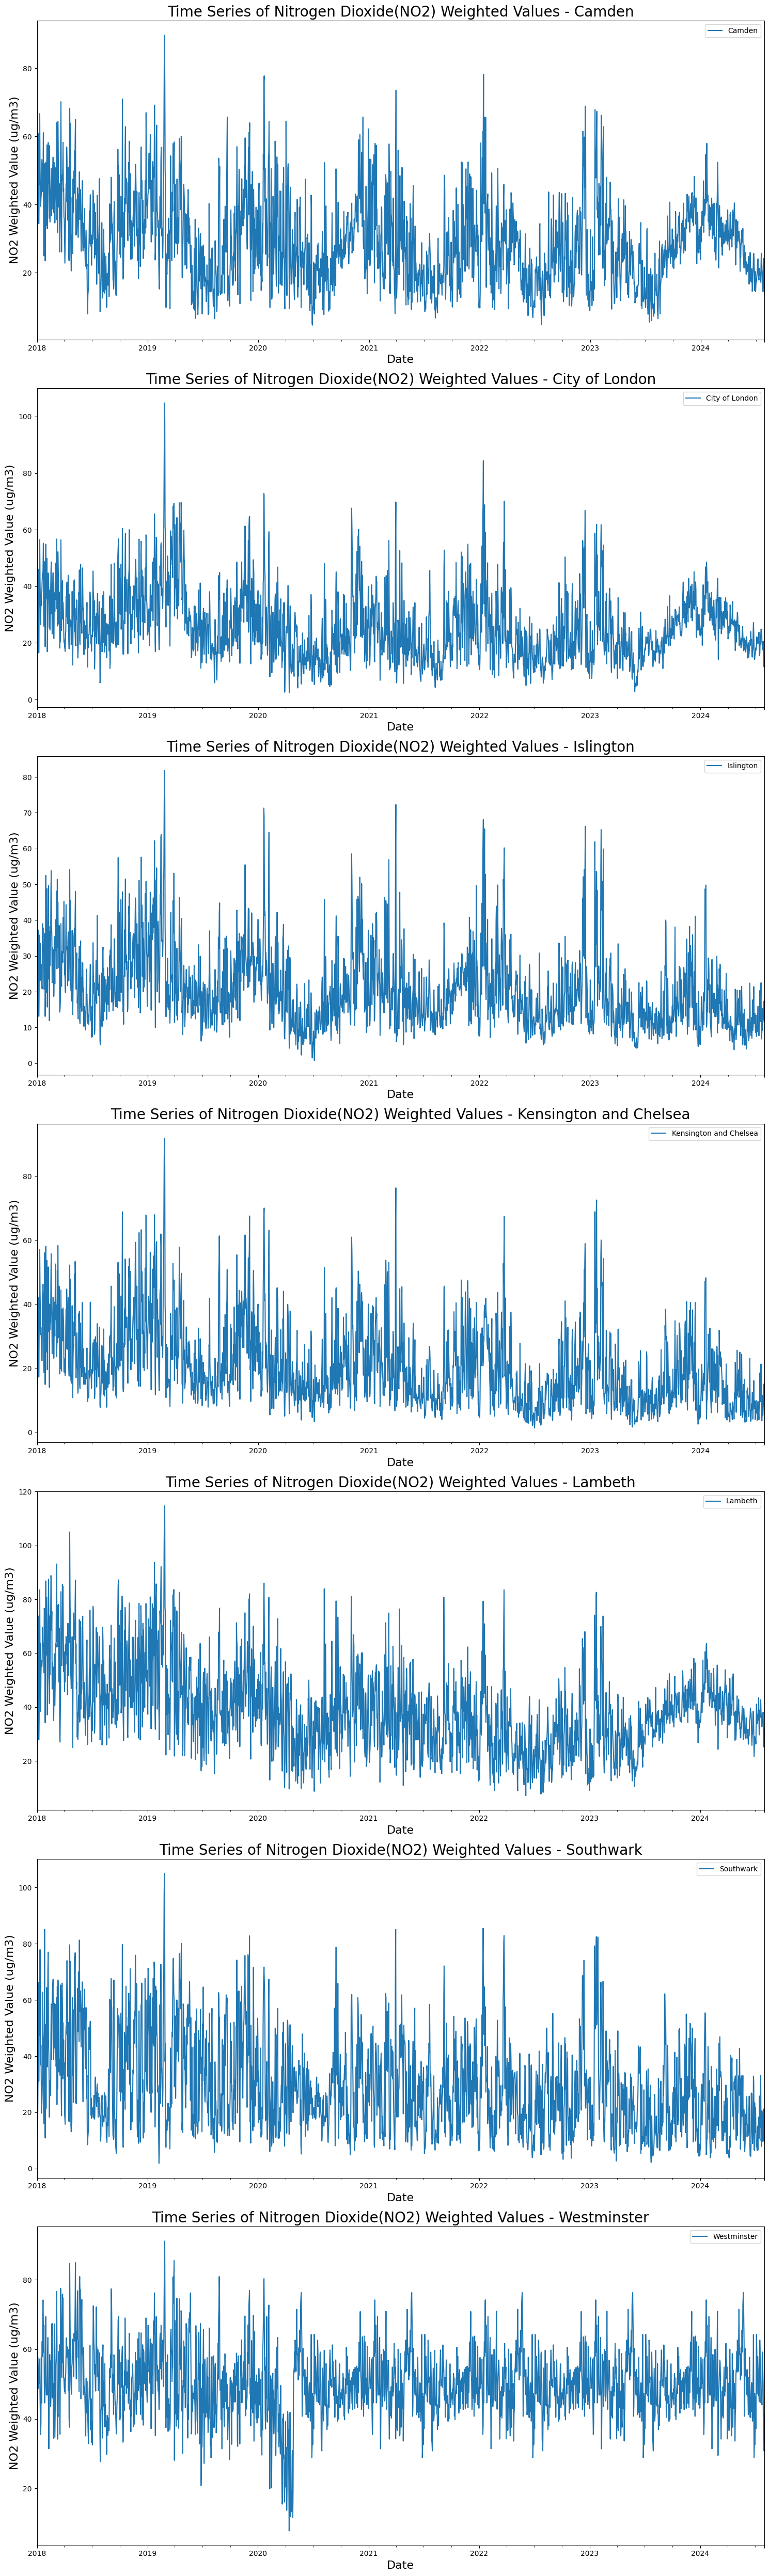

In [114]:
# 绘制时间序列图
plt.figure(figsize=(15, 50))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    df['NO2_weighted_value(ug m-3)'].plot(label=name)

    plt.legend()
    plt.title(f'Time Series of Nitrogen Dioxide(NO2) Weighted Values - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('NO2 Weighted Value (ug/m3)', fontsize=16)

plt.tight_layout()
plt.show()


# PM2.5

In [135]:

def preprocess_data(df):
    df = df[(df['PM25_weighted_value(ug m-3)'] >= 0) & (df['PM25_weighted_value(ug m-3)'] <= 60)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\PM25_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-PM25_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-PM25_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-PM25_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-PM25_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-PM25_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-PM25_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-PM25_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'PM25_weighted_value(ug m-3)']]])
    summary_stats[name] = df['PM25_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df)


            Camden  City of London   Islington  Kensington and Chelsea  \
count  2402.000000     2396.000000  294.000000             2416.000000   
mean      9.512452       12.889169    8.418333                8.492244   
std       6.272121        5.918396    4.375564                6.522451   
min       1.200000        4.000000    0.000000                0.809750   
25%       5.700000        9.200000    5.543646                4.585260   
50%       7.650000       11.250000    7.457202                6.288146   
75%      11.000000       14.333333    9.792500                9.747490   
max      48.700000       50.000000   35.490417               58.249000   

           Lambeth    Southwark  Westminster  
count  2380.000000  2404.000000  2403.000000  
mean     10.230497     9.185084    12.420707  
std       5.422359     5.521697     6.492232  
min       1.500000     1.400000     2.000000  
25%       6.700000     5.733333     8.350000  
50%       8.800000     7.800000    10.900000  
75% 

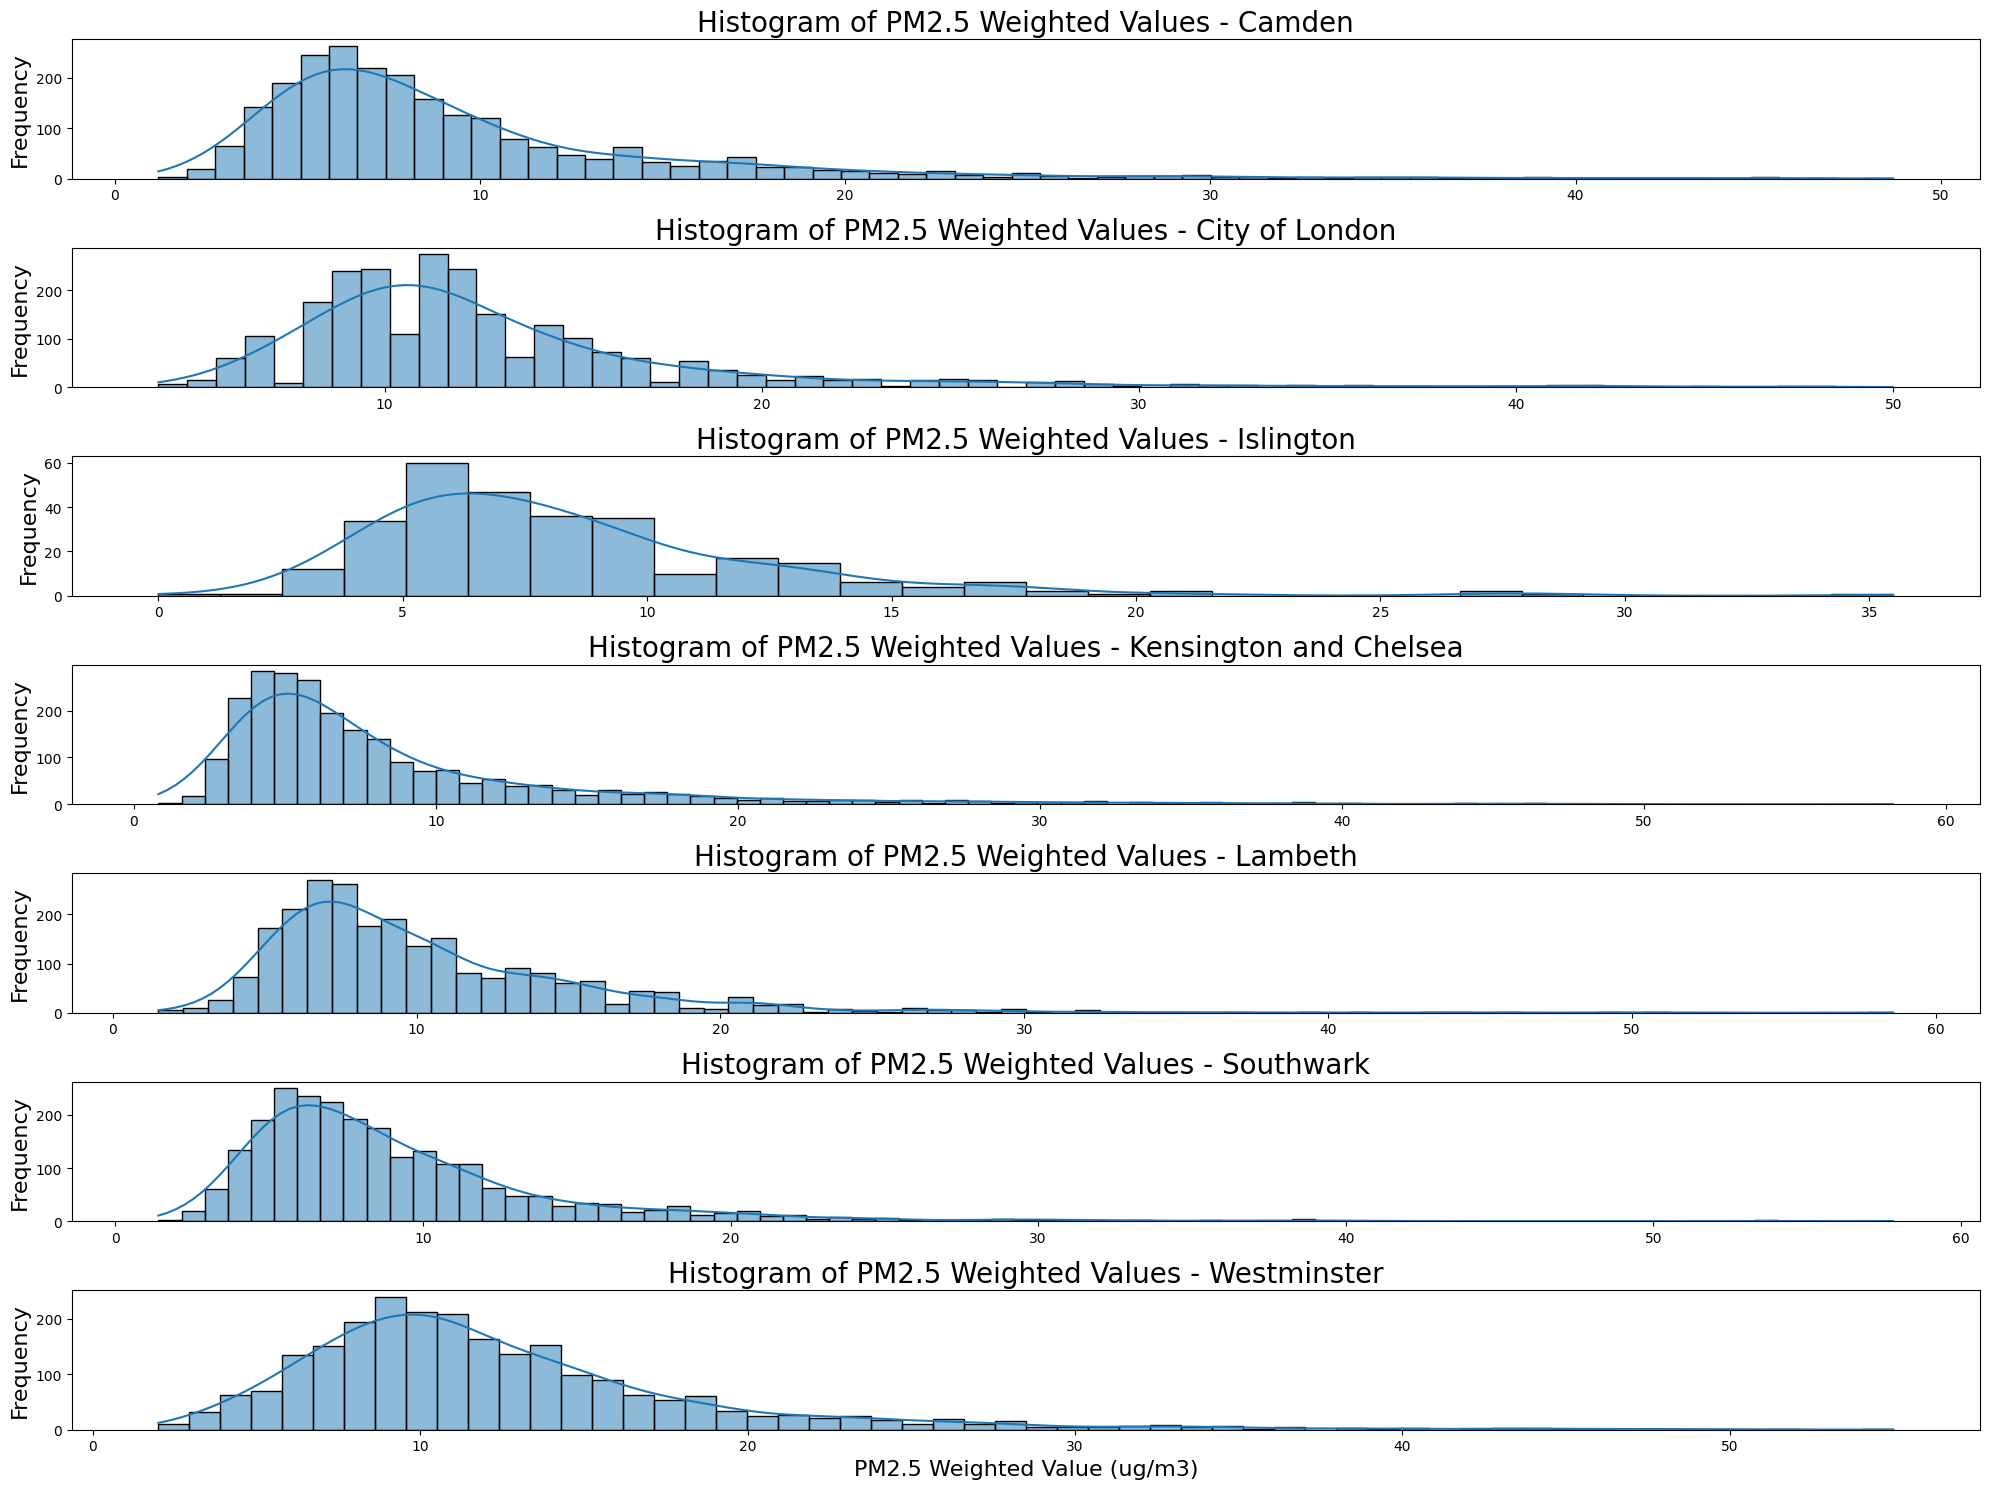

In [132]:

# 可视化数据分布
plt.figure(figsize=(20, 15))

# # 直方图
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    sns.histplot(df['PM25_weighted_value(ug m-3)'], kde=True)
    plt.title(f'Histogram of PM2.5 Weighted Values - {name}', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    if i == len(datasets):  # Only set x-label for the last subplot
        plt.xlabel('PM2.5 Weighted Value (ug/m3)', fontsize=16)
    else:
        plt.xlabel('')  # Hide x-label for other subplots
plt.tight_layout()
plt.show()

# for i, (name, df) in enumerate(datasets.items(), 1):
#     plt.subplot(7, 1, i)
#     sns.histplot(df['NO_weighted_value(ug m-3)'], kde=True)
#     plt.title(f'Histogram of NO Weighted Values - {name}', fontsize=20)

#     plt.ylabel('Frequency', fontsize=16)
# plt.xlabel('NO Weighted Value (ug/m3)', fontsize=16)
# plt.tight_layout()
# plt.show()

C:\Users\Chailee\AppData\Local\Temp\ipykernel_4312\1923534488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='PM25_weighted_value(ug m-3)', data=combined_df, palette="Set2")


Text(0, 0.5, 'PM2.5 Weighted Value (ug/m3)')

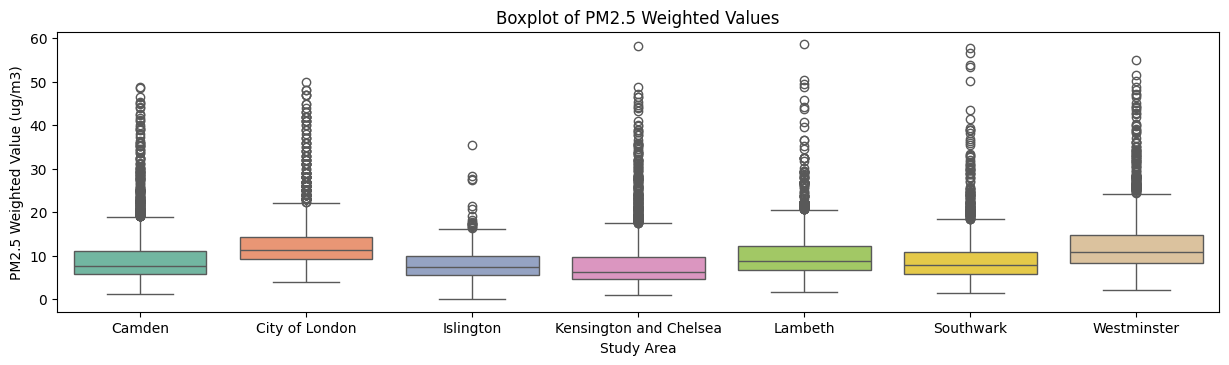

In [133]:
# 可视化数据分布
plt.figure(figsize=(15, 8))
# 箱线图
plt.subplot(2, 1, 2)
sns.boxplot(x='Region', y='PM25_weighted_value(ug m-3)', data=combined_df, palette="Set2")
plt.title('Boxplot of PM2.5 Weighted Values')
plt.xlabel('Study Area')
plt.ylabel('PM2.5 Weighted Value (ug/m3)')

# plt.subplot(2, 1, 2)
# sns.boxplot(data=[df['NO_weighted_value(ug m-3)'] for df in datasets.values()], palette="Set2")
# plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
# plt.title('Boxplot of NO Weighted Values')
# plt.xlabel('Study Area')
# plt.ylabel('NO Weighted Value (ug/m3)')

# plt.tight_layout()
# plt.show()

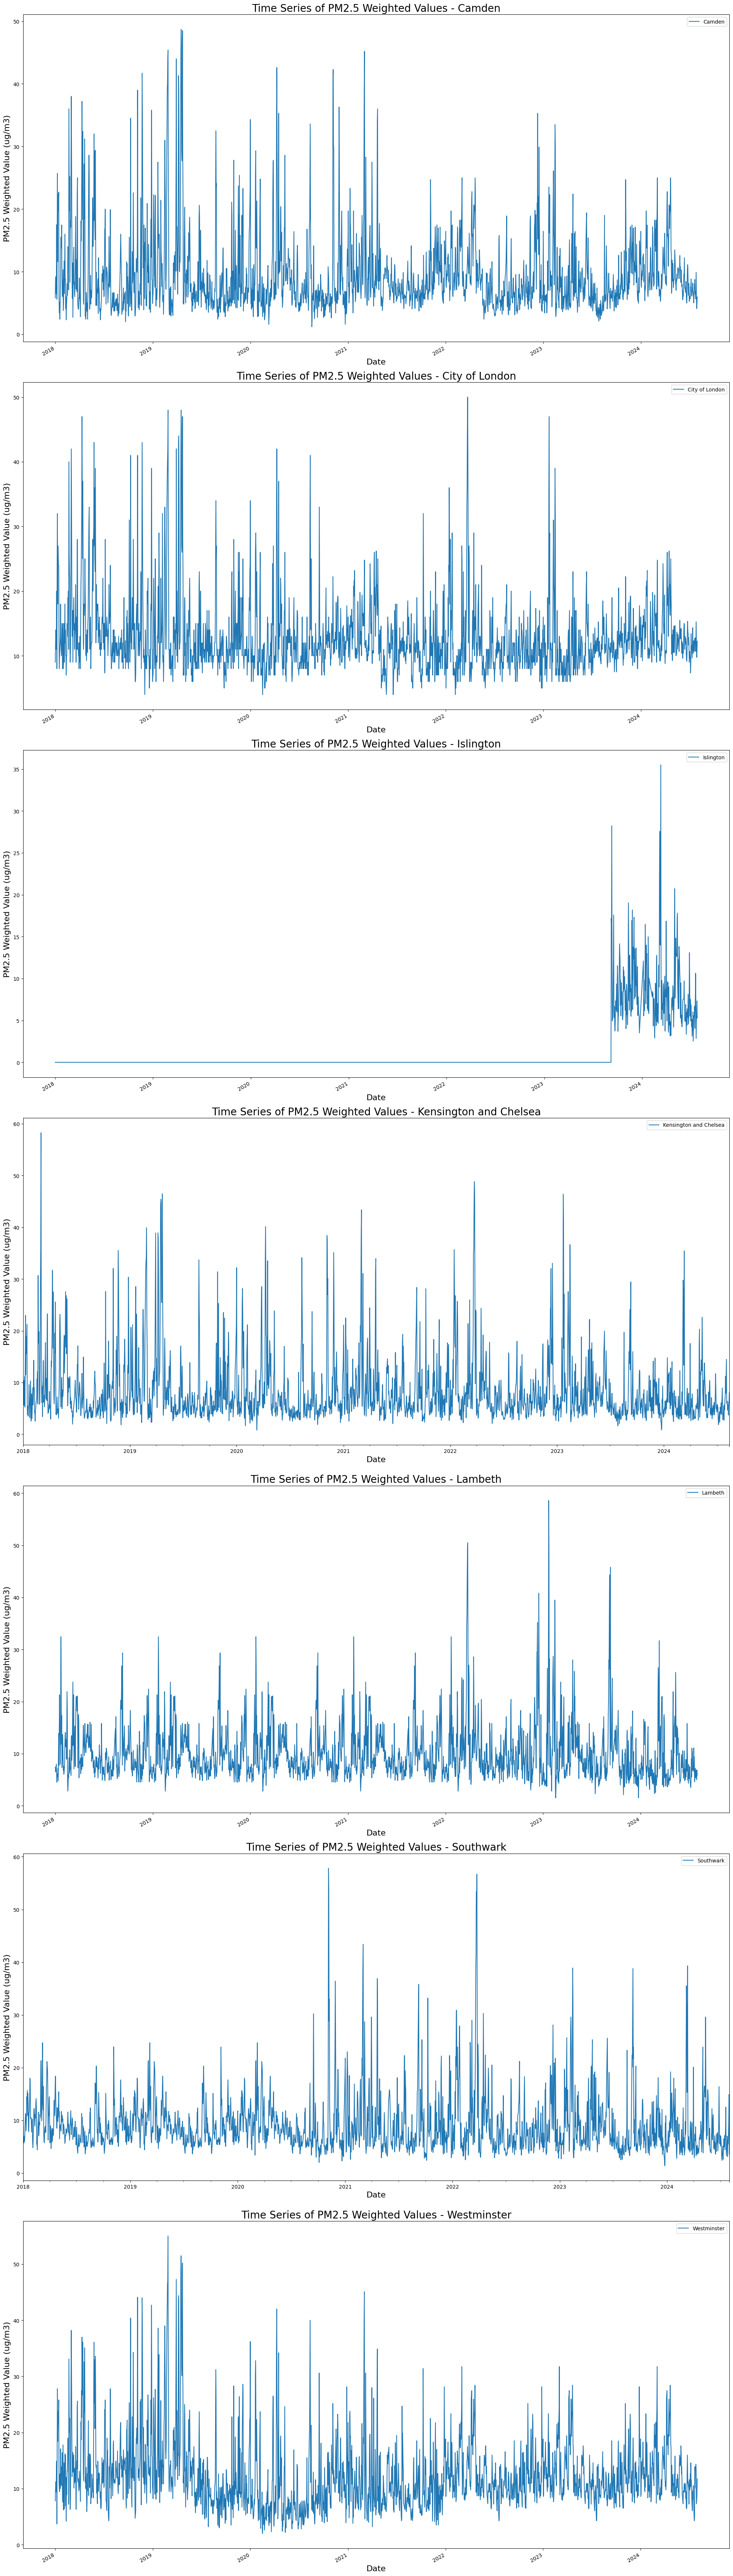

In [136]:
# 绘制时间序列图
plt.figure(figsize=(20, 70))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    df['PM25_weighted_value(ug m-3)'].plot(label=name)

    plt.legend()
    plt.title(f'Time Series of PM2.5 Weighted Values - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('PM2.5 Weighted Value (ug/m3)', fontsize=16)

plt.tight_layout()
plt.show()


# PM10

In [140]:

def preprocess_data(df):
    df = df[(df['PM10_weighted_value(ug m-3)'] >= 0) & (df['PM10_weighted_value(ug m-3)'] <= 120)]
    return df

# 定义文件夹路径
base_folder = r"D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data_output\PM10_weighted"

# 读取数据并进行预处理
camden_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Camden-PM10_weighted.csv')))
city_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'City of London-PM10_weighted.csv')))
islington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Islington-PM10_weighted.csv')))
kensington_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Kensington and Chelsea-PM10_weighted.csv')))
lambeth_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Lambeth-PM10_weighted.csv')))
southwark_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Southwark-PM10_weighted.csv')))
westminster_df = preprocess_data(pd.read_csv(os.path.join(base_folder, 'Westminster-PM10_weighted.csv')))

# 计算汇总统计
datasets = {
    'Camden': camden_df,
    'City of London': city_df,
    'Islington': islington_df,
    'Kensington and Chelsea': kensington_df,
    'Lambeth': lambeth_df,
    'Southwark': southwark_df,
    'Westminster': westminster_df
}

combined_df = pd.DataFrame()
summary_stats = {}
for name, df in datasets.items():
    df['Region'] = name
    combined_df = pd.concat([combined_df, df[['Region', 'PM10_weighted_value(ug m-3)']]])
    summary_stats[name] = df['PM10_weighted_value(ug m-3)'].describe()

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df)


            Camden  City of London    Islington  Kensington and Chelsea  \
count  2403.000000     2403.000000  2403.000000             2416.000000   
mean     16.388519       17.457768    17.423647               13.559111   
std       8.188562        6.976347     8.397405                8.100299   
min       3.200000        3.000000     3.000000                1.395833   
25%      11.400000       13.000000    12.100000                8.436458   
50%      14.483333       16.000000    15.283333               11.284896   
75%      18.616667       20.633333    20.300000               15.854167   
max      75.700000       69.000000    72.000000               68.658333   

           Lambeth    Southwark  Westminster  
count  2404.000000  2404.000000  2404.000000  
mean     39.613880    21.506524    22.584935  
std      17.141789    10.470694     7.882712  
min       4.000000     0.000000     6.000000  
25%      27.000000    14.729167    18.000000  
50%      37.600000    19.000000    21.7750

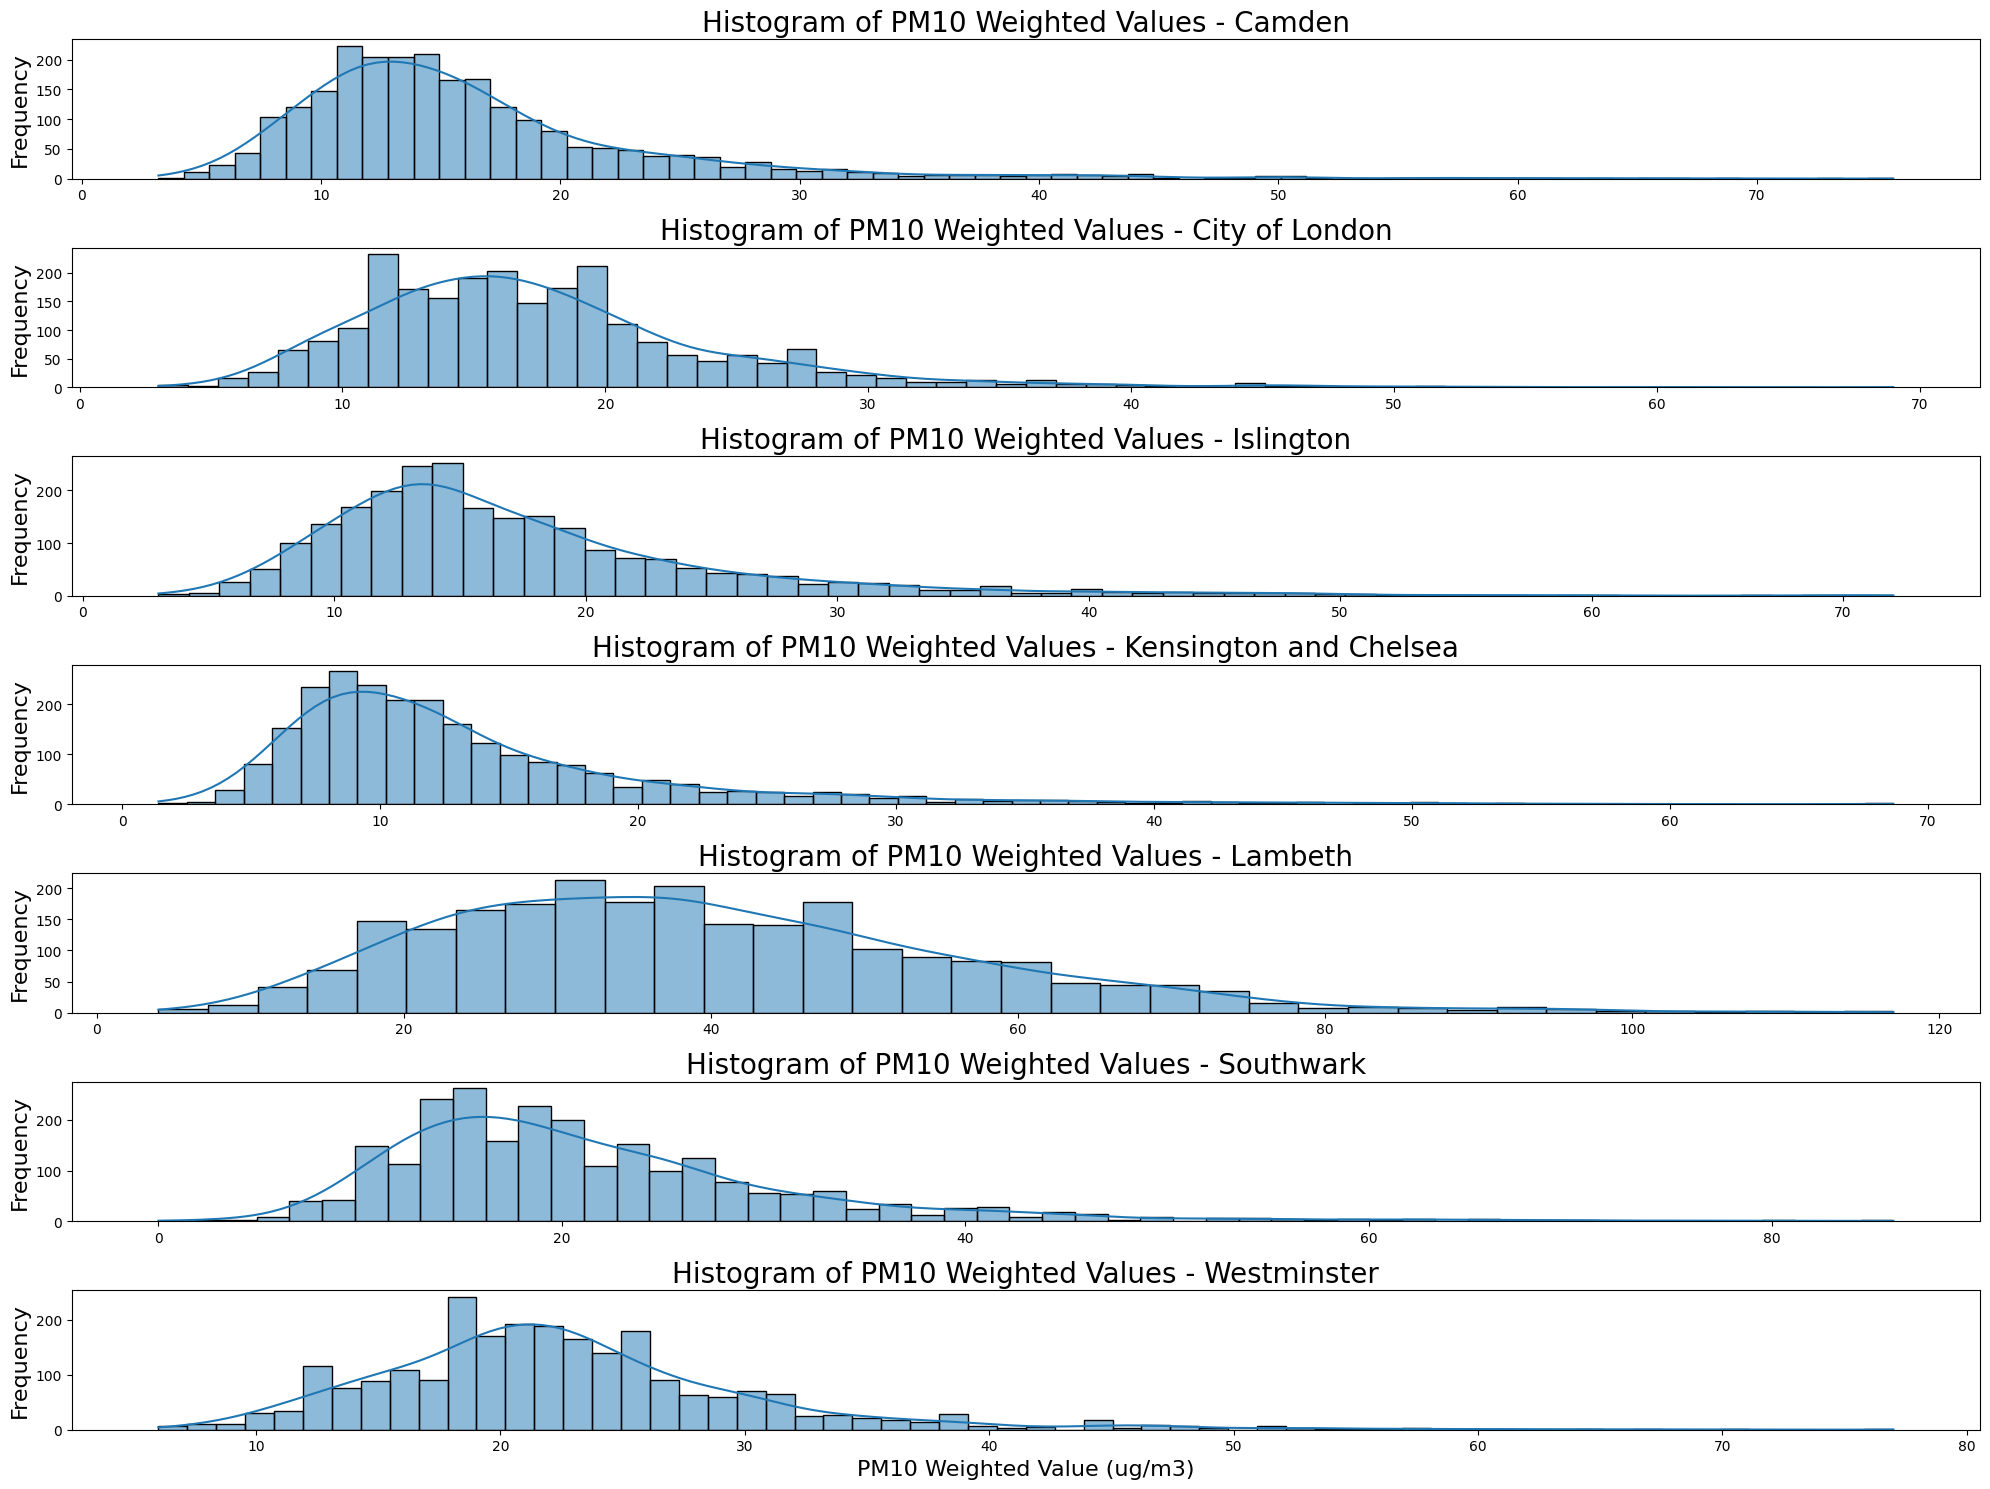

In [141]:

# 可视化数据分布
plt.figure(figsize=(20, 15))

# # 直方图
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    sns.histplot(df['PM10_weighted_value(ug m-3)'], kde=True)
    plt.title(f'Histogram of PM10 Weighted Values - {name}', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    if i == len(datasets):  # Only set x-label for the last subplot
        plt.xlabel('PM10 Weighted Value (ug/m3)', fontsize=16)
    else:
        plt.xlabel('')  # Hide x-label for other subplots
plt.tight_layout()
plt.show()


C:\Users\Chailee\AppData\Local\Temp\ipykernel_4312\2751595979.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='PM10_weighted_value(ug m-3)', data=combined_df, palette="Set2")


Text(0, 0.5, 'PM10 Weighted Value (ug/m3)')

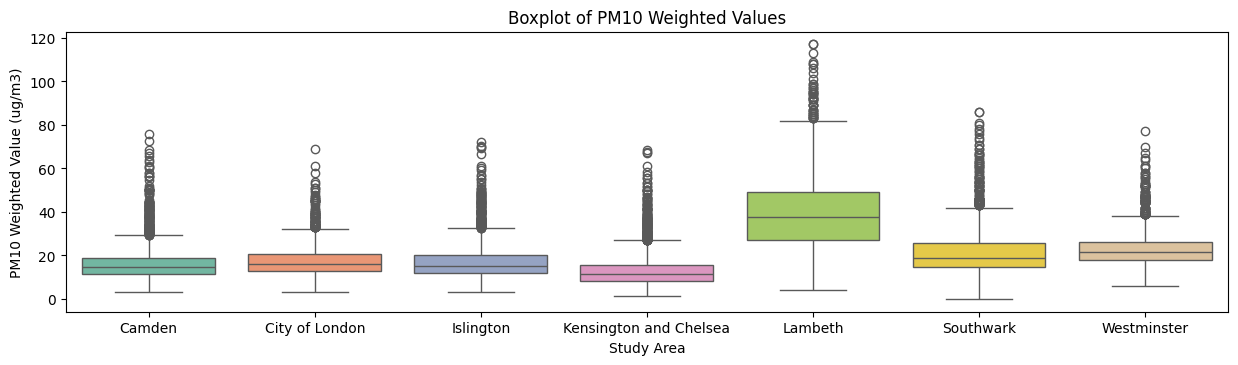

In [142]:
# 可视化数据分布
plt.figure(figsize=(15, 8))
# 箱线图
plt.subplot(2, 1, 2)
sns.boxplot(x='Region', y='PM10_weighted_value(ug m-3)', data=combined_df, palette="Set2")
plt.title('Boxplot of PM10 Weighted Values')
plt.xlabel('Study Area')
plt.ylabel('PM10 Weighted Value (ug/m3)')

# plt.subplot(2, 1, 2)
# sns.boxplot(data=[df['NO_weighted_value(ug m-3)'] for df in datasets.values()], palette="Set2")
# plt.xticks(ticks=range(len(datasets)), labels=datasets.keys())
# plt.title('Boxplot of NO Weighted Values')
# plt.xlabel('Study Area')
# plt.ylabel('NO Weighted Value (ug/m3)')

# plt.tight_layout()
# plt.show()

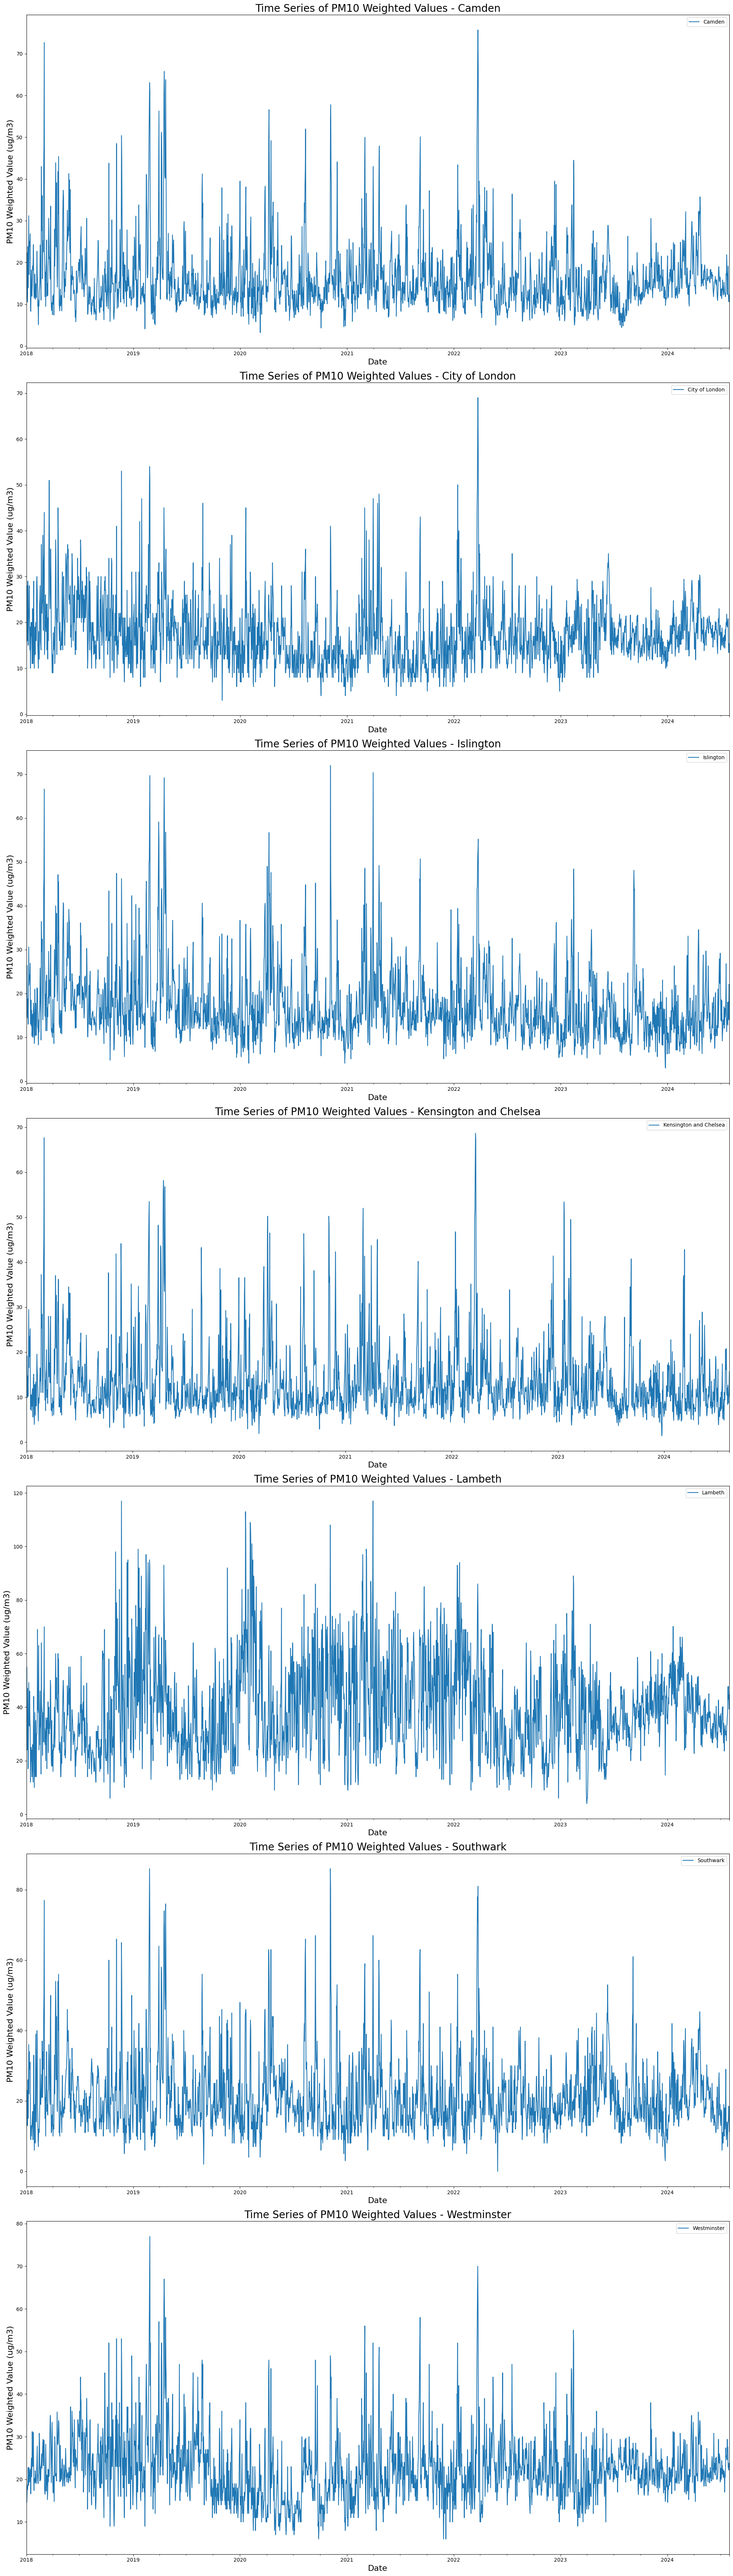

In [143]:
# 绘制时间序列图
plt.figure(figsize=(20, 70))

for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(7, 1, i)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    df['PM10_weighted_value(ug m-3)'].plot(label=name)

    plt.legend()
    plt.title(f'Time Series of PM10 Weighted Values - {name}', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('PM10 Weighted Value (ug/m3)', fontsize=16)

plt.tight_layout()
plt.show()
